<h1><center>Lab Assignment 5</center></h1>

<center> DUE: <font color = 'blue'> Monday, November 7th by 3:00 PM (EST)</font> via Canvas </center>

Please submit:

1) a PDF with all code in-line, generated from Jupytor Notebook
  - If there is an error when you generate pdf, please refer this.
  [4 ways to export Jupyter Notebook as PDF](https://mljar.com/blog/jupyter-notebook-pdf/#:~:text=The%20Jupyter%20Notebook%20has%20an,not%20visible%20in%20the%20screenshot))
  - <font color = red>If you submit your result as ipynb extension, you will deduct points.</font>

<h3><center>Asad Hashmi</center></h3>

**Round your answers to two decimal places, and include all code and figures.**

### Problem Description
You and your housemates decide to have a competition: who can grow the tallest plant in your backyard. First, you collect some data on plant height in inches ($y$) and how many hours of sunlight that plant gets in a day ($x_1$). 

You then notice that while you are using fertilizer A for your plants, one of your housemates decides to invest in fertilizer B, and you begin to wonder which fertilizer you should be using. Luckily, you are taking IOE 366 and can use your knowledge of categorical variables to find out how much better one fertilizer is than the other (use the dataset `lab5_data_categorical1.csv`).

In [7]:
import numpy as np                    #to use matrix operations
import pandas as pd                   #to handle data
import matplotlib.pyplot as plt       #to draw plot
import statsmodels.api as sm          #to use statistical model
import statsmodels.formula.api as smf #to use statistical model

### Data loading

In [8]:
# read in file
df = pd.read_csv("lab5_data_categorical1.csv")
df.head()

,Fertilizer,x1,y,x2
0,A,2.110221,10.368053,0
1,A,2.248655,10.608384,0
2,A,2.185685,11.271274,0
3,A,1.100134,8.980882,0
4,A,5.810538,16.470180,0


Note that Fertilizer A is our baseline, since $x_2 = 0$ for Fertilizer A.

### (a) (4 points)

1. **Construct a scatter plot of plant height ($y$) versus hours of sunlight ($x_1$) that demonstrates the difference between using fertilizer A and B. Please use different colors for fertilizers. Use different colors for fertilizers.**

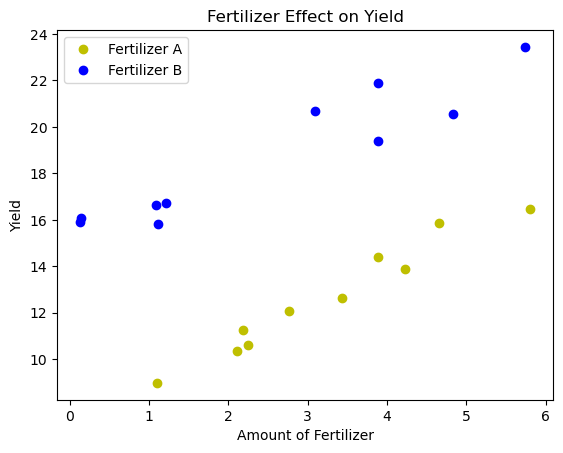

In [9]:
plt.plot(df[df['x2'] == 0]['x1'],df[df['x2'] == 0]['y'],'yo',label = 'Fertilizer A') 
plt.plot(df[df['x2'] == 1]['x1'],df[df['x2'] == 1]['y'],'bo',label = 'Fertilizer B') 
plt.title('Fertilizer Effect on Yield')
plt.xlabel('Amount of Fertilizer')
plt.ylabel('Yield')    
plt.legend()
plt.show()

2. **For further analysis, should you use the regression model for same slopes or different slopes?**

**Answer**

We can use the same slopes

3. **State the model equation that you will use.**

**Answer**

The regression equation is given as follows:

$$
y = \beta_0 + \beta_1x_1 + \beta_2 x_2 + \epsilon
$$
Since $x_2$ takes on values 0 or 1, we can decompose this equation into a system of two equations:

if $x_2 = 0$, that is 'Fertilizer A':
$$
y = \beta_0 + \beta_1 x_1 + \epsilon
$$
if $x_2 = 1$, that is 'Fertilizer B':
$$
y = \beta_0 + \beta_1 x_1 + \beta_2 + \epsilon = (\beta_0 + \beta_2) + \beta_1 x_1 + \epsilon
$$
We can see that the two lines differ only by a constant; we can view this as an adjusted intercept term. The baseline level will have no extra intercept term.

The geometric interpretation of categorical regression is then: we are fitting separate, *parallel* lines (or planes, or hyperplanes) for each category. 

### (b) (6 points)

1. **Using Python, fit a regression model to this data, using an indicator variable $x_2$.**

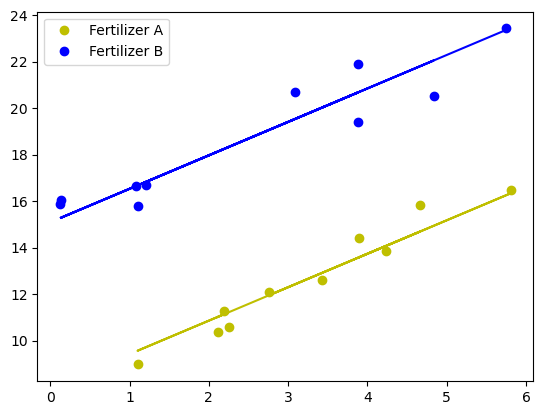

In [14]:

One_Hot_model = smf.ols(formula="y ~ x1 + x2", data=df).fit()

plt.plot(df[df['x2'] == 0]['x1'],df[df['x2'] == 0]['y'],'yo',label = 'Fertilizer A') 
plt.plot(df[df['x2'] == 0]['x1'],One_Hot_model.predict(df[df['x2'] == 0]),'y-') 

plt.plot(df[df['x2'] == 1]['x1'],df[df['x2'] == 1]['y'],'bo',label = 'Fertilizer B')  
plt.plot(df[df['x2'] == 1]['x1'],One_Hot_model.predict(df[df['x2'] == 1]),'b-')

plt.legend()
plt.show()

In [9]:
One_Hot_model = smf.ols(
        formula = 'y ~ x1 + x2',data=df).fit() 
One_Hot_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     214.4
Date:                Mon, 06 Nov 2023   Prob (F-statistic):           8.75e-13
Time:                        00:35:28   Log-Likelihood:                -23.118
No. Observations:                  20   AIC:                             52.24
Df Residuals:                      17   BIC:                             55.22
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.9882      0.449     17.782      0.000       7.040       8.936
x1             1.4393      0.112     12.833      0.000       1.203       1.676
x2             7.1143      0.382     18.631      0.000       6.309       7.920
==============================================================================
Omnibus:                        0.430   Durbin-Watson:                   1.853
Prob(Omnibus):                  0.806   Jarque-Bera (JB):                0.541
Skew:                          -0.102   Prob(JB):                        0.763
Kurtosis:                       2.220   Cond. No.                         9.91
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

2. **Report your intercept and slope parameters for each fertilizer, both in terms of the parameters ($\beta_j$’s) and as values.**

if $x_2 = 0$, that is 'Fertilizer A':
$$
y = 7.9882 + 1.4393x	 
$$
if $x_2 = 1$, that is 'Fertilizer B':
$$
y = \beta_0 + \beta_1 x_1 + \beta_2 + \epsilon = 15.1025 + 1.4393x 
$$

3. **Is there a difference between the fertilizers?**

**Answer**

Yes, fertilizer B will have a higher starting position but the rate of change will be the same.

4. **What does this imply? Explain the difference in words.**

**Answer**

The implication of this is that fertilizer B will help get a higher y value innitially but the rate of change between the two fertilizers is the same. B will always be 7.1143 inches bigger than A.


----


You go to the store to buy some more fertilizer for your plants. You are scanning the aisles, looking for fertilizers A and B, when you come across fertilizer C. You decide to purchase all three to continue your experiment (now, use the dataset `lab5_data_ categorical2.csv`).

In [10]:
# read in file
df2 = pd.read_csv("lab5_data_categorical2.csv")
df2.head()

,Fertilizer,x1,y,x2,x3
0,A,2.110221,10.368053,0,0
1,A,2.248655,10.608384,0,0
2,A,2.185685,11.271274,0,0
3,A,1.100134,8.980882,0,0
4,A,5.810538,16.470180,0,0


### (c) (4 points)

In [11]:
df_dummies = pd.get_dummies(df2, columns=['Fertilizer'])
df_dummies.head()

,x1,y,x2,x3,Fertilizer_A,Fertilizer_B,Fertilizer_C
0,2.110221,10.368053,0,0,1,0,0
1,2.248655,10.608384,0,0,1,0,0
2,2.185685,11.271274,0,0,1,0,0
3,1.100134,8.980882,0,0,1,0,0
4,5.810538,16.470180,0,0,1,0,0


1. **What value does each of your indicator variables take for each fertilizer type? (Fill in the table below based on the data file.)**


Fertilizer A: $x_2 = 0$, $x_3 = 0$
Fertilizer B: $x_2 = 1$, $x_3 = 0$
Fertilizer X: $x_2 = 0$, $x_2 = 1$

2. **Construct a scatter plot of plant height ($y$) versus hours of sunlight ($x_1$) that demonstrates the difference between using fertilizer A, B and C.Use different colors for fertilizers.**

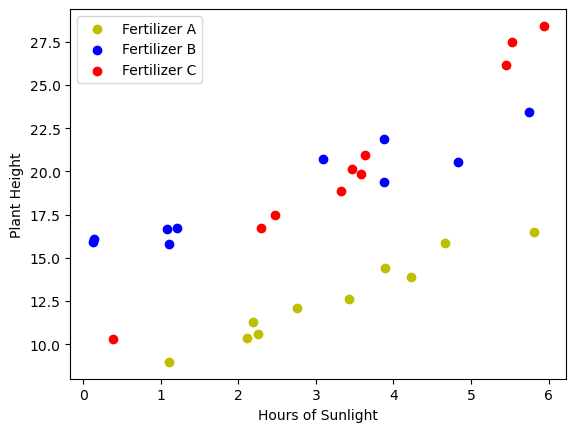

In [12]:
plt.scatter(df_dummies[df_dummies['Fertilizer_A'] == 1]['x1'], 
            df_dummies[df_dummies['Fertilizer_A'] == 1]['y'],
            color='y', label='Fertilizer A')
plt.scatter(df_dummies[df_dummies['Fertilizer_B'] == 1]['x1'], 
            df_dummies[df_dummies['Fertilizer_B'] == 1]['y'], 
            color='b', label='Fertilizer B')
plt.scatter(df_dummies[df_dummies['Fertilizer_C'] == 1]['x1'],
            df_dummies[df_dummies['Fertilizer_C'] == 1]['y'], color='r',
            label='Fertilizer C')

plt.xlabel('Hours of Sunlight')
plt.ylabel('Plant Height')

plt.legend()
plt.show()

3. **For further analysis, should you use the regression model for same slopes or different slopes?**

**Answer**

We will have to use different slopes because the slope seems to be different

4. **State the model equation that you will use.**

**Answer**

Our regression equation in the model with interaction is:

$$
𝑦=𝛽0+𝛽1𝑥1+𝛽2𝑥2+𝛽3𝑥1𝑥2+𝛽5𝑥1𝑥2+𝛽5𝑥1𝑥2𝜖
$$

Again, since $x_2$ & $x_3$ is a binary variable, we can decompose the equation into:

if $x_2 = 0$ & $x_3 = 0$, that is 'Fertilizer A':
$$
y = \beta_0 + \beta_1 x_1 + \epsilon
$$
if $x_2 = 1$ & $x_3 = 0$, that is 'Fertilizer B':
$$
𝑦=(𝛽0+𝛽2)+(𝛽1+𝛽4)𝑥1+𝜖
$$
if $x_2 = 0$ & $x_3 = 1$, that is 'Fertilizer c':
$$
𝑦=(𝛽0+𝛽3)+(𝛽1+𝛽5)𝑥1+𝜖
$$

Now, we can see that not only are the intercepts different between the three lines, but the slopes are as well. The geometric interpretation of fitting a model with interaction is still fitting separate lines for each category, but the lines are no longer constrained to be parallel. 


### (d) (3 points)

1. **Using Python, fit a regression model to this data using indicator variables.**

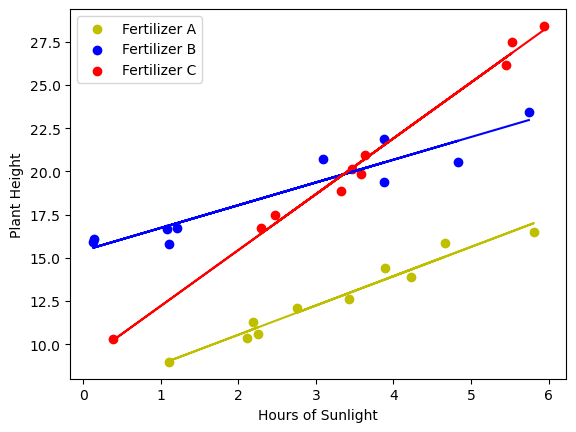

In [13]:
# Prepare sub-dataframes for each fertilizer
df_A = df_dummies[df_dummies['Fertilizer_A'] == 1]
df_B = df_dummies[df_dummies['Fertilizer_B'] == 1]
df_C = df_dummies[df_dummies['Fertilizer_C'] == 1]

# Fit regression line for Fertilizer A
coeffs_A = np.polyfit(df_A['x1'], df_A['y'], 1)
plt.plot(df_A['x1'], coeffs_A[0]*df_A['x1'] + coeffs_A[1], color='y')

# Fit regression line for Fertilizer B
coeffs_B = np.polyfit(df_B['x1'], df_B['y'], 1)
plt.plot(df_B['x1'], coeffs_B[0]*df_B['x1'] + coeffs_B[1], color='b')

# Fit regression line for Fertilizer C
coeffs_C = np.polyfit(df_C['x1'], df_C['y'], 1)
plt.plot(df_C['x1'], coeffs_C[0]*df_C['x1'] + coeffs_C[1], color='r')

# Now plot the scatter points as before
plt.scatter(df_A['x1'], df_A['y'], color='y', label='Fertilizer A')
plt.scatter(df_B['x1'], df_B['y'], color='b', label='Fertilizer B')
plt.scatter(df_C['x1'], df_C['y'], color='r', label='Fertilizer C')

plt.xlabel('Hours of Sunlight')
plt.ylabel('Plant Height')

plt.legend()
plt.show()

2. **Report your intercept and slope values for each fertilizer, both in terms of $\beta_j$'s and as values.**

In [14]:
# Fit regression line and print coefficients for Fertilizer A
coeffs_A = np.polyfit(df_A['x1'], df_A['y'], 1)
print("Fertilizer A:")
print(f"Slope (β1): {coeffs_A[0]}")
print(f"Intercept (β0): {coeffs_A[1]}")

# Fit regression line and print coefficients for Fertilizer B
coeffs_B = np.polyfit(df_B['x1'], df_B['y'], 1)
print("\nFertilizer B:")
print(f"Slope (β1+β3 for x2=1): {coeffs_B[0]}")
print(f"Intercept (β0+β2 for x2=1): {coeffs_B[1]}") 

# Fit regression line and print coefficients for Fertilizer C
coeffs_C = np.polyfit(df_C['x1'], df_C['y'], 1)
print("\nFertilizer C:")
print(f"Slope (β1+β5 for x2=2): {coeffs_C[0]}")
print(f"Intercept (β0+β4 for x2=2): {coeffs_C[1]}")

Fertilizer A:
Slope (β1): 1.6937554025029005
Intercept (β0): 7.163059507552046

Fertilizer B:
Slope (β1+β3 for x2=1): 1.3139161675310016
Intercept (β0+β2 for x2=1): 15.417136505145654

Fertilizer C:
Slope (β1+β5 for x2=2): 3.229219098859112
Intercept (β0+β4 for x2=2): 8.992199618295581


**Answer**

Fertilizer A:
Slope (β1): 1.6938
Intercept (β0): 7.1631 

Fertilizer B:
Slope (β1+β3 for x2=1): 1.3139
Intercept (β0+β2 for x2=1): 15.4171

Fertilizer C:
Slope (β1+β5 for x2=2): 3.2292
Intercept (β0+β4 for x2=2): 8.9922

### (e) (2 points) 

In Michigan, we get **2.34** hours of sunlight per day on average. 

1. **With this knowledge, calculate your expected plant height *for each* fertilizer.**

**Answer**

Fertilizer A: 1.6938(2.34) + 7.1631 = 11.1266 inches

Fertilizer B: 1.3139(2.34) + 15.4171 = 18.4916 inches

Fertilizer C: 3.2292(2.34) + 8.9922 = 16.5485 inches

2. **Which fertilizer should you use to maximize your plant height?**

**Answer**

In the long run, I would choose fertilizer B as it has the greatest slope and will eventually overtake the other fertilizers

### (f) (2 points) 
Spring Break is long over, but who says you can’t take another break in the middle of the semester? Suppose that you want to go to Florida (again), and you plan on bringing your plants with you, but you need to decide which fertilizer to bring. In Florida, you will get **6.08** hours of sunlight per day on average. 

1. **Using your regression models, predict your plant height *for each* fertilizer in this much sunlight.**

**Answer**

Fertilizer A: 1.6938(6.08) + 7.1631 = 17.4614 inches

Fertilizer B: 1.3139(6.08) + 15.4171 = 23.4056 inches

Fertilizer C: 3.2292(6.08) + 8.9922 = 28.6257 inches

2. **Which fertilizer should you bring to maximize your plant height during your second vacation?**

**Answer**

Fertilizer C is the best to optimize height.